In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# CSV files to import

MMR_totals = "Cleaned_Data/2009_2019_CDC_MMR.csv"
M_Deaths_race = "Resources_P3/Maternal_Deaths_race_2009-2019.csv"
Births = "Resources_P3/Births_for_calculation_2009-2019.csv"
M_Deaths_single_race = "Resources_P3/Single_Race_15_Maternal_Deaths_2018-2019.csv"

In [91]:
# read csv files
MMR_totals = pd.read_csv(MMR_totals)
deaths_df = pd.read_csv(M_Deaths_race)
births_df = pd.read_csv(Births)
single_race_deaths = pd.read_csv(M_Deaths_single_race)

#### CDC Maternal Deaths by race 2009-2019 [source](https://wonder.cdc.gov/ucd-icd10.html)

In [88]:
deaths_df.head(50)

,State,State Code,Year,Race,Race Code,Hispanic Origin,Hispanic Origin Code,Deaths,Population,Crude Rate
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,0,Unreliable
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,18,0,Unreliable
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,25,704201,3.6
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,15,1655605,Unreliable
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,706754,Unreliable
5,Alabama,1,2018,White,2106-3,Not Hispanic or Latino,2186-2,16,1657262,Unreliable
6,Alabama,1,2019,Black or African American,2054-5,Not Hispanic or Latino,2186-2,15,709544,Unreliable
7,Alabama,1,2019,White,2106-3,Not Hispanic or Latino,2186-2,17,1660160,Unreliable
8,Arizona,4,2013,White,2106-3,Not Hispanic or Latino,2186-2,13,0,Unreliable
9,Arizona,4,2014,White,2106-3,Not Hispanic or Latino,2186-2,12,1947854,Unreliable


In [93]:
# change "Population" column to "Population by Race"
deaths_df = deaths_df.rename(columns={"Population": "Population by Race"})
deaths_df.head()

,State,State Code,Year,Race,Race Code,Hispanic Origin,Hispanic Origin Code,Deaths,Population by Race,Crude Rate
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,0,Unreliable
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,18,0,Unreliable
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,25,704201,3.6
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,15,1655605,Unreliable
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,706754,Unreliable


#### CDC Natality 2009-2019 (not separated by race, for calculation) [source](https://wonder.cdc.gov/natality-current.html)

In [43]:
births_df.head()

,Year,State,State Code,Births
0,2009,Alabama,1,62475
1,2009,Alaska,2,11324
2,2009,Arizona,4,92798
3,2009,Arkansas,5,39808
4,2009,California,6,527020


In [44]:
# merge two dataframes 
CDC_MMR_data = pd.merge(deaths_df, births_df, how="inner", on=["State", "State Code", "Year"])
CDC_MMR_data.head()

,State,State Code,Year,Race,Race Code,Hispanic Origin,Hispanic Origin Code,Deaths,Population,Crude Rate,Births
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,0,Unreliable,59151
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,18,0,Unreliable,59151
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,25,704201,3.6,58941
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,15,1655605,Unreliable,58941
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,706754,Unreliable,57761


In [45]:
ratio = round(CDC_MMR_data["Deaths"] / CDC_MMR_data["Births"] * 100000, 2)
ratio

0      23.67
1      30.43
2      42.42
3      25.45
4      24.24
       ...  
383    54.80
384    14.12
385    14.75
386    19.36
387    14.92
Length: 388, dtype: float64

In [46]:
CDC_MMR_data["Maternal Mortality Ratio"] = ratio
CDC_MMR_data.head()

,State,State Code,Year,Race,Race Code,Hispanic Origin,Hispanic Origin Code,Deaths,Population,Crude Rate,Births,Maternal Mortality Ratio
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,0,Unreliable,59151,23.67
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,18,0,Unreliable,59151,30.43
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,25,704201,3.6,58941,42.42
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,15,1655605,Unreliable,58941,25.45
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,706754,Unreliable,57761,24.24


In [47]:
CDC_MMR_final_df = CDC_MMR_data[["State", "State Code", "Year", "Race", "Race Code", "Hispanic Origin", "Hispanic Origin Code", "Deaths", "Births", "Maternal Mortality Ratio", "Population"]]
CDC_MMR_final_df.head()

,State,State Code,Year,Race,Race Code,Hispanic Origin,Hispanic Origin Code,Deaths,Births,Maternal Mortality Ratio,Population
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,59151,23.67,0
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,18,59151,30.43,0
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,25,58941,42.42,704201
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,15,58941,25.45,1655605
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,57761,24.24,706754


In [48]:
#rename columns for database use
CDC_MMR_by_race_df = CDC_MMR_final_df.rename(columns={"State": "state",
                                                    "State Code": "state_code", 
                                                    "Year": "year",
                                                    "Race": "race",
                                                    "Race Code": "race_code",
                                                    "Hispanic Origin": "hispanic_origin",
                                                    "Hispanic Origin Code": "hispanic_origin_code",
                                                    "Deaths": "deaths",
                                                    "Births": "births",
                                                    "Maternal Mortality Ratio": "maternal_mortality_ratio",
                                                    "Population": "population"})
CDC_MMR_by_race_df.head(50)

,state,state_code,year,race,race_code,hispanic_origin,hispanic_origin_code,deaths,births,maternal_mortality_ratio,population
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,59151,23.67,0
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,18,59151,30.43,0
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,25,58941,42.42,704201
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,15,58941,25.45,1655605
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,57761,24.24,706754
5,Alabama,1,2018,White,2106-3,Not Hispanic or Latino,2186-2,16,57761,27.70,1657262
6,Alabama,1,2019,Black or African American,2054-5,Not Hispanic or Latino,2186-2,15,58615,25.59,709544
7,Alabama,1,2019,White,2106-3,Not Hispanic or Latino,2186-2,17,58615,29.00,1660160
8,Arizona,4,2013,White,2106-3,Not Hispanic or Latino,2186-2,13,85600,15.19,0
9,Arizona,4,2014,White,2106-3,Not Hispanic or Latino,2186-2,12,86887,13.81,1947854


#### Exploratory Data Analysis: MMR by race in U.S. for years 2009-2019

In [49]:
CDC_MMR_by_race_df.groupby(["race", "hispanic_origin"])["maternal_mortality_ratio"].mean()

race                       hispanic_origin       
Asian or Pacific Islander  Not Hispanic or Latino     2.605000
Black or African American  Not Hispanic or Latino    15.714397
White                      Hispanic or Latino         8.203421
                           Not Hispanic or Latino    17.774335
Name: maternal_mortality_ratio, dtype: float64

In [86]:
# CDC_MMR_by_race_df.groupby(["race", "hispanic_origin"]).agg({"maternal_mortality_ratio":["mean", "median", "max", "min"]})
race_agg = CDC_MMR_by_race_df.groupby(["race"]).agg({"maternal_mortality_ratio":["mean", "median", "max", "min"]})
race_agg

maternal_mortality_ratio                    
                                              mean median    max   min
race                                                                  
Asian or Pacific Islander                 2.605000   2.55   3.27  2.02
Black or African American                15.714397  12.58  55.40  2.45
White                                    16.265228  14.37  54.80  3.53

In [79]:
avg_by_race = CDC_MMR_by_race_df.groupby("race").mean().reset_index()
avg_by_race

,race,state_code,year,deaths,births,maternal_mortality_ratio,population
0,Asian or Pacific Islander,6.000000,2015.000000,12.500000,483001.333333,2.605000,1.550544e+06
1,Black or African American,28.333333,2014.390071,20.255319,175226.368794,15.714397,5.672433e+05
2,White,28.506224,2014.456432,21.165975,176954.439834,16.265228,2.112764e+06


In [80]:
asian_specific_data = CDC_MMR_by_race_df.loc[(CDC_MMR_by_race_df["race"] == "Asian or Pacific Islander")]
asian_specific_data

,state,state_code,year,race,race_code,hispanic_origin,hispanic_origin_code,deaths,births,maternal_mortality_ratio,population
23,California,6,2010,Asian or Pacific Islander,A-PI,Not Hispanic or Latino,2186-2,11,510198,2.16,2720149
33,California,6,2013,Asian or Pacific Islander,A-PI,Not Hispanic or Latino,2186-2,10,494705,2.02,0
37,California,6,2014,Asian or Pacific Islander,A-PI,Not Hispanic or Latino,2186-2,11,502879,2.19,0
44,California,6,2016,Asian or Pacific Islander,A-PI,Not Hispanic or Latino,2186-2,16,488827,3.27,0
51,California,6,2018,Asian or Pacific Islander,A-PI,Not Hispanic or Latino,2186-2,14,454920,3.08,3278357
55,California,6,2019,Asian or Pacific Islander,A-PI,Not Hispanic or Latino,2186-2,13,446479,2.91,3304759


In [81]:
# looking at just 2019 
MMR_2019_race = CDC_MMR_by_race_df.loc[(CDC_MMR_by_race_df["year"] == 2019)]
MMR_2019_race.groupby(["race"]).agg({"maternal_mortality_ratio":["mean", "median", "max", "min"]})

maternal_mortality_ratio                    
                                              mean median    max   min
race                                                                  
Asian or Pacific Islander                 2.910000   2.91   2.91  2.91
Black or African American                17.531765  14.90  43.67  2.46
White                                    15.261304  13.48  33.39  4.26

In [82]:
CDC_MMR_by_race_df.groupby(["race", "hispanic_origin"]).agg({"births":["mean", "median", "max", "min"]})

births          \
                                                           mean  median   
race                      hispanic_origin                                 
Asian or Pacific Islander Not Hispanic or Latino  483001.333333  491766   
Black or African American Not Hispanic or Latino  175226.368794  130042   
White                     Hispanic or Latino      337143.921053  380337   
                          Not Hispanic or Latino  146968.231527  111426   

                                                                  
                                                     max     min  
race                      hispanic_origin                         
Asian or Pacific Islander Not Hispanic or Latino  510198  446479  
Black or African American Not Hispanic or Latino  527020   36636  
White                     Hispanic or Latino      527020   79375  
                          Not Hispanic or Latino  527020   18248

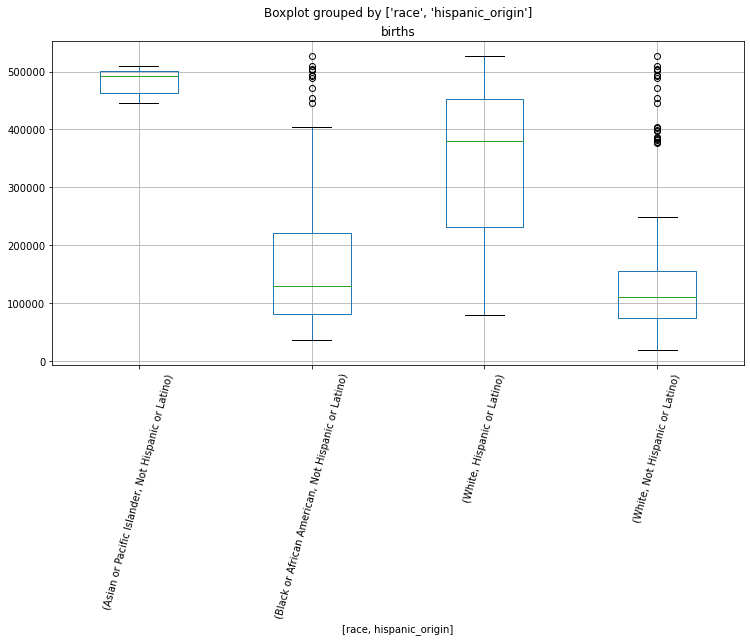

In [83]:
group_data = CDC_MMR_by_race_df.groupby(["race", "hispanic_origin"])
boxplot = CDC_MMR_by_race_df.boxplot(column=["births"], by=["race", "hispanic_origin"], rot=75, figsize=(12,6))
### Births are total for State!!!!

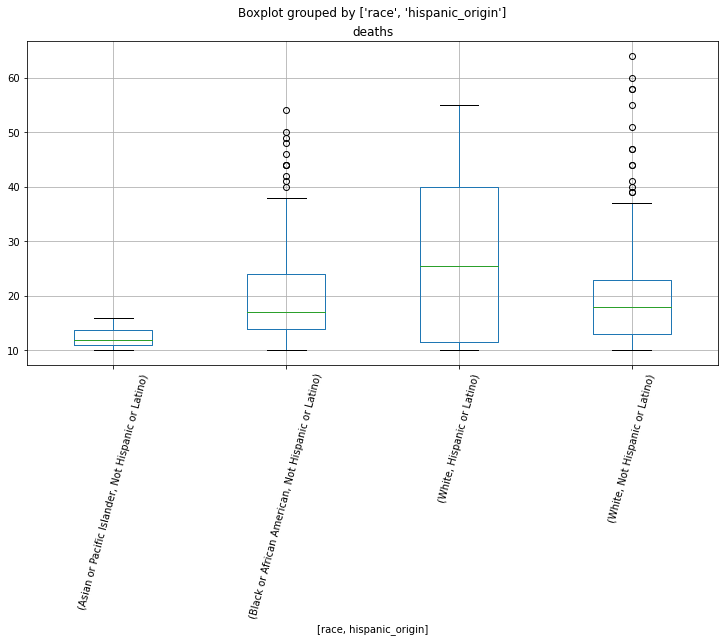

In [84]:
group_data = CDC_MMR_by_race_df.groupby(["race", "hispanic_origin"])
boxplot = CDC_MMR_by_race_df.boxplot(column=["deaths"], by=["race", "hispanic_origin"], rot=75, figsize=(12,6))

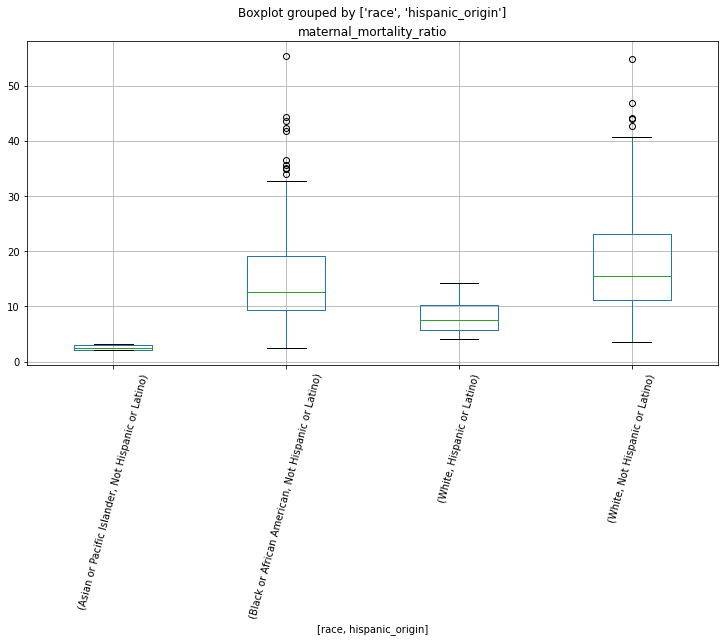

In [85]:
group_data = CDC_MMR_by_race_df.groupby(["race", "hispanic_origin"])
boxplot = CDC_MMR_by_race_df.boxplot(column=["maternal_mortality_ratio"], by=["race", "hispanic_origin"], rot=75, figsize=(12,6))

In [87]:
CDC_MMR_by_race_df.corr()

,state_code,year,deaths,births,maternal_mortality_ratio,population
state_code,1.000000,-0.003414,0.076853,-0.200229,0.015813,0.030284
year,-0.003414,1.000000,-0.078901,-0.119619,0.106998,0.362474
deaths,0.076853,-0.078901,1.000000,0.463293,0.150383,0.172267
births,-0.200229,-0.119619,0.463293,1.000000,-0.612551,0.253773
maternal_mortality_ratio,0.015813,0.106998,0.150383,-0.612551,1.000000,-0.157121
population,0.030284,0.362474,0.172267,0.253773,-0.157121,1.000000


#### CDC Maternal Deaths with Single-Race Request option (only available for years 2018-2019)[source](https://wonder.cdc.gov/ucd-icd10-expanded.html)

In [42]:
single_race_deaths

,State,State Code,Year,Single Race 15,Single Race 15 Code,Hispanic Origin,Hispanic Origin Code,Deaths
0,Alabama,1,2018,White,1,Not Hispanic or Latino,2186-2,16
1,Alabama,1,2018,Black,2,Not Hispanic or Latino,2186-2,14
2,Arizona,4,2018,White,1,Hispanic or Latino,2135-2,10
3,Arizona,4,2018,White,1,Not Hispanic or Latino,2186-2,10
4,Arkansas,5,2018,White,1,Not Hispanic or Latino,2186-2,10
5,California,6,2018,White,1,Hispanic or Latino,2135-2,31
6,California,6,2018,White,1,Not Hispanic or Latino,2186-2,22
7,California,6,2018,Black,2,Not Hispanic or Latino,2186-2,10
8,Florida,12,2018,White,1,Hispanic or Latino,2135-2,10
9,Florida,12,2018,White,1,Not Hispanic or Latino,2186-2,22


#### Export csv of MMR separated by race for 2009-2019

In [43]:
# export file as a CSV, without the Pandas Index, but with the header
CDC_MMR_by_race_df.to_csv("Cleaned_Data/MMR_by_race_ML.csv", index=False, header=True, float_format='%.2f')